In [0]:
!pip install tmtoolkit #installing in google colab

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

     |████████████████████████████████| 19.9MB 1.2MB/s 
     |████████████████████████████████| 2.3MB 49.7MB/s 
     |████████████████████████████████| 112kB 46.6MB/s 
     |████████████████████████████████| 1.5MB 45.6MB/s 
     |████████████████████████████████| 3.0MB 53.2MB/s 
     |████████████████████████████████| 22.1MB 177kB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449908 sha256=890ec03183f725ceb3ef4b73dc39fb11948cced2bfeffaa71ab981138774b21a
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
  Created wheel for globre: filename=globre-0.1.5-cp36-none-any.whl size=19528 sha256=d0b69dc27defe1a1b13215ba6ee60e4dc84b89f8a0a55f53e54f2b95c394db23
  Stored in directory: /root/.cache/pip/wheels/c4/3f/7f/be546f6d880521a8a7a1fe84cbe135fa859be63084682d3292
Successfully built nltk globre
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
  Foun

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import random
random.seed(20191120)

import numpy as np
np.set_printoptions(precision=5)

from tmtoolkit.corpus import Corpus
url = "https://s3.amazonaws.com/vargo.aprd6342/data/rusdata_utf8.csv"

import codecs
import csv
import urllib

corpus = Corpus() #corpus: set of documents
TEXT_FIELD = 8

with urllib.request.urlopen(url) as response: #performing a web request to open url 
  stream = urllib.request.urlopen(url) #opening the url 
  csvfile= csv.reader(codecs.iterdecode(stream,'utf-8')) 
  for i, line in enumerate(csvfile):
    corpus.add_doc(str(i), line[TEXT_FIELD])

In [0]:
print(len(corpus))
corpus.doc_labels
corpus['91']

2604


'Expecting mother includes late husband in maternity photo shoot Through the struggles and pains of losing a dear husband. Nicole Bennett has built courage to take maternity photos with her 4-year-old son. She added old photos of late husband Deonta  but they were slightly faded to appear as a spirit \x92¢Î\x97Î\x94 a symbol of hope that he watches over them. She also did this as a memorial for her unborn daughter who is due March 25. We commend her for her boldness and we hope that she finds solace in these photos. #NicoleBernett #Maternityphotoswithlatehusband'

(array([1759.,  389.,  182.,  130.,   78.,   37.,   18.,    6.,    3.,
           2.]),
 array([   0. ,  239.3,  478.6,  717.9,  957.2, 1196.5, 1435.8, 1675.1,
        1914.4, 2153.7, 2393. ]),
 <a list of 10 Patch objects>)

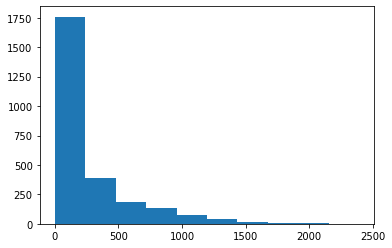

In [0]:
import matplotlib
matplotlib.pyplot.hist(corpus.doc_lengths.values())

In [0]:
from tmtoolkit.preprocess import TMPreproc
preproc = TMPreproc (corpus)
preproc.pos_tag()
preproc.lemmatize()
preproc.tokens_to_lowercase()
preproc.remove_special_chars_in_tokens()
preproc.add_stopwords(['http','nt'])

<TMPreproc [2604 documents]>

In [0]:
corpus['91']

'Expecting mother includes late husband in maternity photo shoot Through the struggles and pains of losing a dear husband. Nicole Bennett has built courage to take maternity photos with her 4-year-old son. She added old photos of late husband Deonta  but they were slightly faded to appear as a spirit \x92¢Î\x97Î\x94 a symbol of hope that he watches over them. She also did this as a memorial for her unborn daughter who is due March 25. We commend her for her boldness and we hope that she finds solace in these photos. #NicoleBernett #Maternityphotoswithlatehusband'

In [0]:
preproc.tokens['91']

['expecting',
 'mother',
 'include',
 'late',
 'husband',
 'in',
 'maternity',
 'photo',
 'shoot',
 'through',
 'the',
 'struggle',
 'and',
 'pain',
 'of',
 'lose',
 'a',
 'dear',
 'husband',
 '',
 'nicole',
 'bennett',
 'have',
 'build',
 'courage',
 'to',
 'take',
 'maternity',
 'photo',
 'with',
 'her',
 '4yearold',
 'son',
 '',
 'she',
 'add',
 'old',
 'photo',
 'of',
 'late',
 'husband',
 'deonta',
 'but',
 'they',
 'be',
 'slightly',
 'fade',
 'to',
 'appear',
 'as',
 'a',
 'spirit',
 '\x92¢î\x97î\x94',
 'a',
 'symbol',
 'of',
 'hope',
 'that',
 'he',
 'watch',
 'over',
 'them',
 '',
 'she',
 'also',
 'do',
 'this',
 'as',
 'a',
 'memorial',
 'for',
 'her',
 'unborn',
 'daughter',
 'who',
 'be',
 'due',
 'march',
 '25',
 '',
 'we',
 'commend',
 'her',
 'for',
 'her',
 'boldness',
 'and',
 'we',
 'hope',
 'that',
 'she',
 'find',
 'solace',
 'in',
 'these',
 'photo',
 '',
 '',
 'nicolebernett',
 '',
 'maternityphotoswithlatehusband']

In [0]:
preproc.vocabulary_size

8952

In [0]:
preproc.stem()

<TMPreproc [2604 documents]>

In [0]:
preproc.tokens_datatable

,doc,position,token,meta_pos
0,0,0,text,NN
0,1,0,god,NNP
1,1,1,bless,NNP
2,1,2,dixi,NNP
3,1,3,,.
...,...,...,...,...
7,999,7,a,DT
8,999,8,black,JJ
9,999,9,tinker,NNP
10,999,10,bell,NNP


In [0]:
preproc_smaller = preproc.copy()
preproc_smaller.filter_for_pos('N')
preproc_smaller.clean_tokens(remove_numbers=True, remove_shorter_than=2)
preproc_smaller.remove_uncommon_tokens(df_threshold= 0.01)
print(preproc.vocabulary_size)
print(preproc_smaller.vocabulary_size)

7418
216


In [0]:
print(preproc.tokens['91'])
print(preproc_smaller.tokens['91'])
print(preproc.tokens['1'])
print(preproc_smaller.tokens['1'])
print(preproc.tokens['2000'])
print(preproc_smaller.tokens['2000'])

['expect', 'mother', 'includ', 'late', 'husband', 'in', 'matern', 'photo', 'shoot', 'through', 'the', 'struggl', 'and', 'pain', 'of', 'lose', 'a', 'dear', 'husband', '', 'nicol', 'bennett', 'have', 'build', 'courag', 'to', 'take', 'matern', 'photo', 'with', 'her', '4yearold', 'son', '', 'she', 'add', 'old', 'photo', 'of', 'late', 'husband', 'deonta', 'but', 'they', 'be', 'slight', 'fade', 'to', 'appear', 'as', 'a', 'spirit', '\x92¢î\x97î\x94', 'a', 'symbol', 'of', 'hope', 'that', 'he', 'watch', 'over', 'them', '', 'she', 'also', 'do', 'this', 'as', 'a', 'memori', 'for', 'her', 'unborn', 'daughter', 'who', 'be', 'due', 'march', '25', '', 'we', 'commend', 'her', 'for', 'her', 'bold', 'and', 'we', 'hope', 'that', 'she', 'find', 'solac', 'in', 'these', 'photo', '', '', 'nicolebernett', '', 'maternityphotoswithlatehusband']
['shoot', 'memori']
['god', 'bless', 'dixi', '', 'the', 'south', 'will', 'rise', 'again', '']
['god', 'south']
['the', 'head', 'of', 'chicago', 's', 'ipra', 'sharon', 'f

In [0]:
doc_labels = np.array(preproc.doc_labels)
doc_labels[:10]

array(['0', '1', '10', '100', '1000', '1001', '1002', '1003', '1004',
       '1005'], dtype='<U4')

In [0]:
vocab_bg = np.array(preproc.vocabulary)
vocab_sm = np.array(preproc_smaller.vocabulary)

In [0]:
dtm_bg = preproc.dtm
dtm_sm = preproc_smaller.dtm

dtm_bg,dtm_sm

(<2604x7418 sparse matrix of type '<class 'numpy.int32'>'
 	with 81355 stored elements in Compressed Sparse Row format>,
 <2604x216 sparse matrix of type '<class 'numpy.int32'>'
 	with 13245 stored elements in Compressed Sparse Row format>)